<a href="https://colab.research.google.com/github/tatianatorogomez/Analisis-decercion-trabajo-IBM/blob/main/Proyecto1_Tatiana_Toro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**DESERCIÓN EMPLEADOS IBM**
*Por: Tatiana Toro Gómez*

###**Descripción**
---
##*Descripción general*
En el siguiente archivo se desarrollará el análisis y visualización del conjunto de datos "*Desgaste y rendimineto de empleados de IBM HR Analytics*" el cual fue tomado de la plataforma Kaggle, con el fin de investigar principalmente los factores que conducen a la deserción en esta empresa, este dataset contiene 35 atributos y 1470 datos de personas. 
En la tabla hay atributos métricos como salario mensual, cantidad de tiempo trabajando en la empresa, y tambien atributos dicotómicos, es decir que estan categorizados por número, como campo de educación, genero. Igualmente cada atributo se explica detalladamente más adelante. 

El análisis de este tema podria servir para determinar factores de deserción en empleos no necesariamente de IBM, es decir teniendo en cuenta empresas tecnológicas, bajo algunas condiciones similares se podrian establecer los motivos de desgaste de empleados. 

##*Problema*

La deserción de empleados es un tema importante para las empresas y principalmente el desconocimineto de los motivos por los cuales esto ocurre, ya sean por factores de la empresa o externos de los empleados. IBM una empresa tecnológica desarrollo este dataset con el fin de conocer la razón principal, esto con el fin de que en el futuro se pueda generar un modelo que prediga que factores deben modificar tanto en la empresa como en la seleccion de personal para tener la deserción en los trabajadores. 

##*Objetivos*


*   Identificar los principales fatores por los cuales los empleados se van de la empresa.
*   Identificar si existen condiciones diferentes en cuanto al genero en la empresa. 
*   Generar un modelo que a partir de factores como la ganancia, o el tiempo que lleva trabajndo pueda desertar de la empresa.


##*Hipótesis*

*   Se espera encontrar etiquetas que tengan relación con respecto a la decersión 
*   Se espera tener alguna diferencia en condiciones según el genero
*   Se espera tener relación entre la ganancia mensual de cada empleado y su puesto de trabajo o su nivel de trabajo. 




###**Importar librerias y Dataset**
---
A continuación se importarán las librerias necesarias para ejecutar el proyecto, igualmente se exporta el csv llamado **`dataibm.csv`**. 

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
import scipy.stats as ss
%matplotlib inline
plt.rcParams['figure.dpi'] = 110   

In [ ]:
!python --version
print('Pandas', pd.__version__)
print('NumPy', np.__version__)
print('SciPy', scipy.__version__)
print('statsmodels', sm.__version__)

Python 3.7.10
Pandas 1.1.5
NumPy 1.19.5
SciPy 1.4.1
statsmodels 0.10.2


In [ ]:
# Importar datos
ibmdata = pd.read_csv('dataibm.csv')


###**Descripción del Dataset**
---
A continuación se realizará una descripción del dataset en general, explicando tamaño de la matriz, y la especificación de las etiquetas de cada columna.

| Variable |Asignación| Definición	| 
| --- | --- | --- |
| Age   |Edad| 	Valor numerico  |
| Attrition |Desgaste |Empleado que abandona la empresa (0 = no, 1 = sí)|
| Business travel |viajes de negocio ||
| dailyrate  | tarifa diaria  | Valor numérico - Nivel salarial|
| depatment  | departamento  | (1 = RRHH, 2 = I + D, 3 = Ventas) |
| distance from home | distancia de casa  |Valor numérico: LA DISTANCIA DEL TRABAJO A LA CASA |
| education | educacion | Valor numérico |
| education field | campo de educacion  |(1 = RRHH, 2 = CIENCIAS DE LA VIDA, 3 = MARKETING, 4 = CIENCIAS MÉDICAS, 5 = OTROS, 6 = TÉCNICO) |
| employee count  | numero de empleados | Valor numérico |
| enviroment satisfaction |satisfacción ambiental | Valor numérico  |
|gender|genero  | (1 = FEMENINO, 2 = MASCULINO)|
| hourly rate | tarifa por hora | Valor numérico - SALARIO POR HORA |
|job involvement | participacion laboral  | Valor numérico - PARTICIPACIÓN EN EL TRABAJO |
|job level | nivel de trabajo  | Valor numérico |
| job role  | puesto de trabajo  |(1 = HC REP, 2 = HR, 3 = TÉCNICO DE LABORATORIO, 4 = GERENTE, 5 = DIRECTOR GERENTE, 6 = DIRECTOR DE INVESTIGACIÓN, 7 = CIENTÍFICO DE INVESTIGACIÓN, 8 = EJECUTIVO DE VENTAS, 9 = REPRESENTANTE DE VENTAS) |
| job satisfaction  | satisfacción laboral  | Valor numérico|
| marital status  | estado civil  | (1 = DIVORCIADO, 2 = CASADO, 3 = SOLTERO) |
| monthly income | ingreso mensual | Valor numérico |
| monthly rate  | tasa mensual  | Valor numérico |
| number companies workwd  | numero de empresas trabajan  | Valor numérico |
| over 18  |mayores de 18  | (1 = SÍ, 2 = NO) |
| over time | tiempo extraordinario | (1 = NO, 2 = SÍ)|
| percent salary hike | porcentraje de aumento salarial  | Valor numérico - PORCENTAJE DE AUMENTO DEL SALARIO.|
| performance rating  | clasificacion de rendimineto  | Valor numéric |
| relationshp faction  | faccion de relaciciones | Valor numéric |
| standard hours |horas estandar  |Valor numéric |
| stock option level  | nivel de opciones sobre acciones  | Valor numérico - OPCIONES DE STOCK.Cuántas acciones de la empresa posee de esta empresa |
| total working years  | años de trabajos totales | Valor numérico |
| training times last year | tiempos de entrenamiento el año pasado  |Valor numérico |
| work life balance | equilibrio trabajo vida  | Valor numérico |
| years at company  | años en la empresa  | Valor numérico |
| years incurrent role  | años de rol actual  | Valor numérico |
| years with current manager  | años con el gerente actual  | Valor numérico |









In [ ]:
ibmdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1467 non-null   float64
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [ ]:
ibmdata.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1467.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1467.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.315610,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.282890,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.370111,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.781182,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
ibmdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102.0,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8.0,0,1,6,4,0,5
1,49,No,Travel_Frequently,NaN,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10.0,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373.0,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7.0,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392.0,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8.0,3,3,8,7,3,0
4,27,No,Travel_Rarely,591.0,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6.0,3,3,2,2,2,2


###**Estadística exploratoria**
---
Antes de realizar el anális exploratorio de los datos, se eliminaran las columnas que no son de gran relevancia o que tiene información redundante. 

In [ ]:
ibmdata=ibmdata.drop(['EmployeeCount'], axis=1)
ibmdata=ibmdata.drop(['MonthlyRate'], axis=1)

A continuación se presentan algunas medidas importantes, sin embargo muchas medidas se evidencian mejor de manera gráfica, más adelante se presentará una visualización sencilla de variables importantes. 

In [ ]:
edad_media='{0:.3f}'.format(ibmdata['Age'].mean()) # edad promedio
mayor=ibmdata['Age'].max() # edad maxima
menor=ibmdata['Age'].min() #edad minima
desgaste=ibmdata['Attrition'].value_counts() # conteo de personas por desercion 
tarifa_diaria_media='{0:.3f}'.format(ibmdata['DailyRate'].mean()) #promedio de tarifa diaria 
tarifa_diaria_moda=ibmdata['DailyRate'].mode() # moda tarifa diaria 
genero=ibmdata['Gender'].value_counts() # conteo por genero 
rol=ibmdata['JobRole'].value_counts() # conteo por rol 
explo=pd.DataFrame() # crear datadrame para visualizar mejor los resultados 
explo['Variable']=['Edad media','Edad mayor','Edad menor','Desgaste','Media tarifa diaria','moda tarifa diaria','Genero','Rol']
explo['Resultado']=[edad_media,mayor,menor,desgaste,tarifa_diaria_media,tarifa_diaria_moda,genero,rol]
explo

,Variable,Resultado
0,Edad media,36.924
1,Edad mayor,60
2,Edad menor,18
3,Desgaste,"No 1233 Yes 237 Name: Attrition, dtype..."
4,Media tarifa diaria,802.316
5,moda tarifa diaria,0 691.0 dtype: float64
6,Genero,"Male 882 Female 588 Name: Gender, dtyp..."
7,Rol,Sales Executive 326 Research Scie...


A continuación se muestran los datos de la varianza de cada atributo y partir de estos se identifica que el dato **`StandardHours `** tiene una varianza de 0 es decir que el dato es el mismo, por lo cual no se tendra en cuenta. Igualmente se observan los atributos de menor a mayor varianza, resaltando **`MonthlyIncome`**  (ingreso mensual) como el dato que mas se aleja de la media y **`PerformanceRating  `** (clasificacion de rendimiento) el dato que mas se acerca a la media. 

In [ ]:
varianza=(ibmdata.var()).sort_values() # varianza de cada atributo
varianza

StandardHours               0.000000e+00
PerformanceRating           1.301936e-01
WorkLifeBalance             4.991081e-01
JobInvolvement              5.063193e-01
StockOptionLevel            7.260346e-01
Education                   1.048914e+00
RelationshipSatisfaction    1.169013e+00
EnvironmentSatisfaction     1.194829e+00
JobSatisfaction             1.216270e+00
JobLevel                    1.225316e+00
TrainingTimesLastYear       1.662219e+00
NumCompaniesWorked          6.240049e+00
YearsSinceLastPromotion     1.038406e+01
YearsWithCurrManager        1.273160e+01
YearsInCurrentRole          1.312712e+01
PercentSalaryHike           1.339514e+01
YearsAtCompany              3.753431e+01
TotalWorkingYears           6.054679e+01
DistanceFromHome            6.572125e+01
Age                         8.345505e+01
HourlyRate                  4.132856e+02
DailyRate                   1.627074e+05
EmployeeNumber              3.624333e+05
MonthlyIncome               2.216486e+07
dtype: float64

Al sacar la desviación estandar resaltamos el dato con menor disperción con respecto a la media muestral como **`PerformanceRating  `** e igualmente 4 datos con una disperción con respecto a la media muestral muy alta es decir que estas variables su tendencia fue muy diferente en los trabajadores de IBM. 

In [ ]:
ibmdata=ibmdata.drop(['StandardHours'], axis=1) # elimino columna con datos iguales 
desv_est=(ibmdata.std()).sort_values() # hallar desviacion estandar 
desv_est

PerformanceRating              0.360824
WorkLifeBalance                0.706476
JobInvolvement                 0.711561
StockOptionLevel               0.852077
Education                      1.024165
RelationshipSatisfaction       1.081209
EnvironmentSatisfaction        1.093082
JobSatisfaction                1.102846
JobLevel                       1.106940
TrainingTimesLastYear          1.289271
NumCompaniesWorked             2.498009
YearsSinceLastPromotion        3.222430
YearsWithCurrManager           3.568136
YearsInCurrentRole             3.623137
PercentSalaryHike              3.659938
YearsAtCompany                 6.126525
TotalWorkingYears              7.781182
DistanceFromHome               8.106864
Age                            9.135373
HourlyRate                    20.329428
DailyRate                    403.370111
EmployeeNumber               602.024335
MonthlyIncome               4707.956783
dtype: float64

Se determinó la curtosis por cada atributo de datos,e igualmente se determino la media de estos obteniendo como resultado 0.219 indicando que en promedio los datos forman una campana gaussiana es decir su densidad es mayor en un punto de la grafica no estan distribuidos.

In [ ]:
curtosis=ibmdata.kurtosis().mean() # media de la curtosis 
curtosis

0.21992654828363595

Al determinar la media de la simetría de los atributos evidenciamos que tienen una tendencia hacia la izquierda es decir valores pequeños.

In [ ]:
asimetria=ibmdata.skew().mean() # hallar simetria 
asimetria

0.5809792724954557

In [ ]:
ibmdata['Gender']=ibmdata['Gender'].replace('Female', 1 )
ibmdata['Gender']=ibmdata['Gender'].replace('Male', 0 )
ibmdata['Attrition']=ibmdata['Attrition'].replace('Yes', 1 )
ibmdata['Attrition']=ibmdata['Attrition'].replace('No', 0 )


A continuación realizamos un mapa de correlación sencillo entre todas las variables numéricas, es por esto que las columnas **`Attrition`** y **`Gender`** previamente se categorizaron en 1 o 0 para obtener datos en la correlación ya que son datos relevantes para el estudio. 
Podemos evidenciar que en general no se tiene mucha correlación en variables, solo en casos particulares, es por esto que más adelante se estudiaran grupos especificos. 


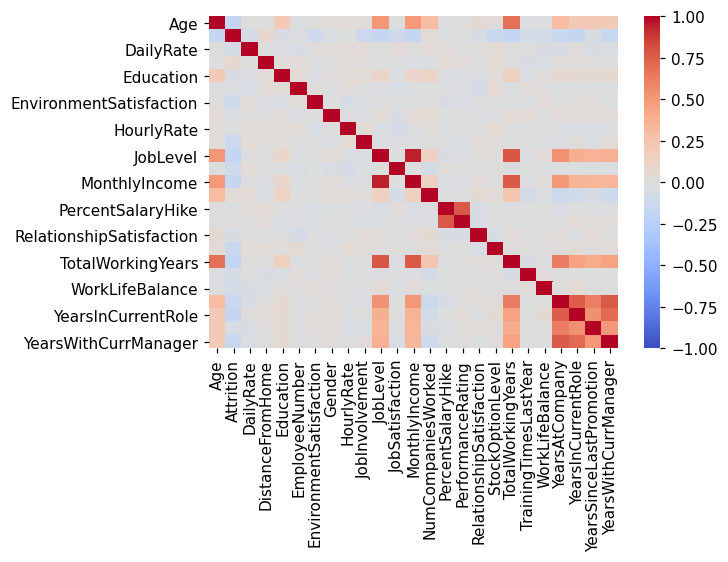

In [ ]:

correlacion_total = sns.heatmap(ibmdata.corr(),cmap='coolwarm',vmin=-1);# correlacion de toda la matriz

Text(0, 0.5, 'Cantidad de pesonas')

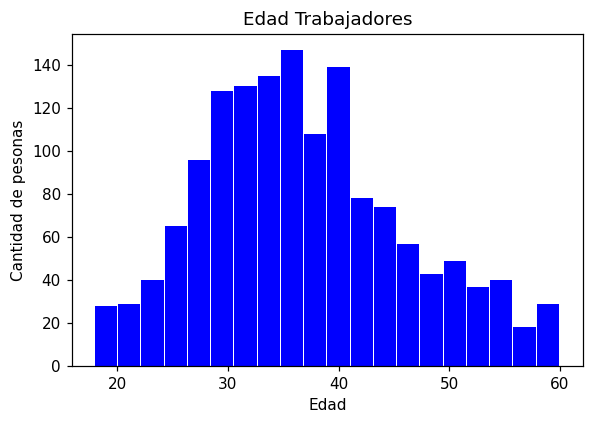

In [ ]:
# histograma que muestra la edad de los trabajadores
edad=plt.hist(ibmdata['Age'], bins=20, width=2,color='blue')  
plt.title('Edad Trabajadores')
plt.xlabel('Edad')
plt.ylabel('Cantidad de pesonas')

Text(0.35, 700, 'Abandona la empresa 0=No 1=Si')

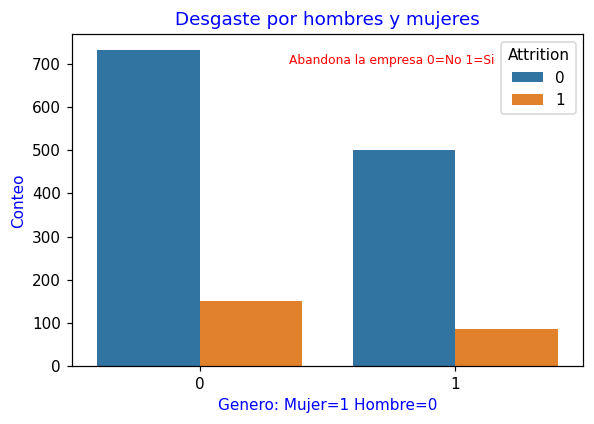

In [ ]:
# gráfica donde se evidencia la cantidad de deserciones por genero
desgaste_hombre_mujer=sns.countplot(x='Gender', data=ibmdata,hue='Attrition');
desgaste_hombre_mujer.set_title('Desgaste por hombres y mujeres', color="blue")
desgaste_hombre_mujer.set_xlabel('Genero: Mujer=1 Hombre=0', color="blue")
desgaste_hombre_mujer.set_ylabel('Conteo', color="blue")
desgaste_hombre_mujer.text(0.35, 700,
        r"Abandona la empresa 0=No 1=Si", 
        fontsize=8, 
        color="red")

Text(0.5, 500, 'Abandona la empresa 0=No 1=Si')

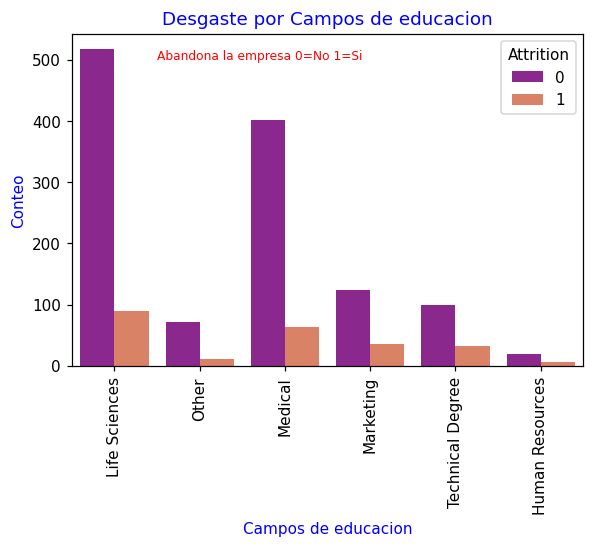

In [ ]:
# grafica de barras especificando cuantas personas abandonaron la empresa por campos de educacion
desgaste_educacion=sns.countplot(x='EducationField', data=ibmdata,hue='Attrition', palette='plasma');
desgaste_educacion.set_title('Desgaste por Campos de educacion',color="blue")
desgaste_educacion.set_xlabel('Campos de educacion', color="blue")
desgaste_educacion.set_ylabel('Conteo',color="blue")
desgaste_educacion.tick_params(axis='x', labelrotation=90)
desgaste_educacion.text(0.5, 500,
        r"Abandona la empresa 0=No 1=Si", 
        fontsize=8, 
        color="red")

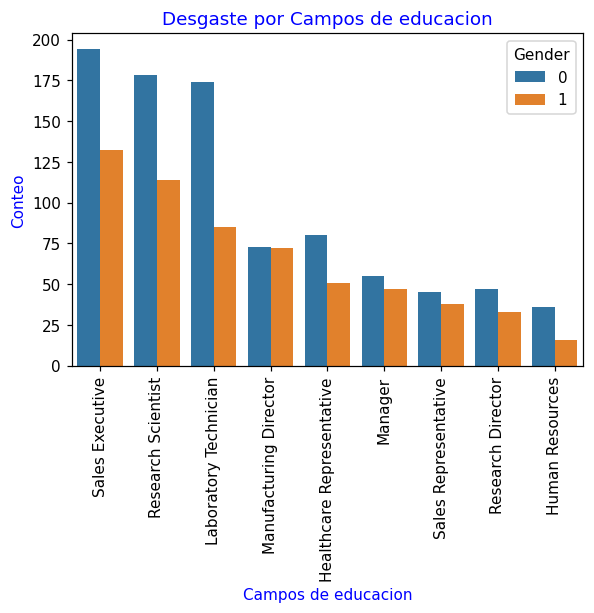

In [ ]:
# cuantas personas por genero en campos de educacion 
desgaste_puestos=sns.countplot(x='JobRole', data=ibmdata,hue='Gender');
desgaste_puestos.set_title('Desgaste por Campos de educacion',color="blue")
desgaste_puestos.set_xlabel('Campos de educacion', color="blue")
desgaste_puestos.set_ylabel('Conteo',color="blue")
desgaste_puestos.tick_params(axis='x', labelrotation=90)

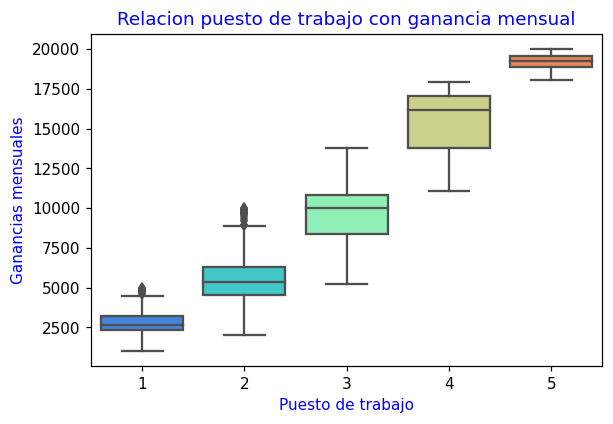

In [ ]:
# grafica que relacion puesto de trabajo con la ganancia mensual 
ganancia_mes=ibmdata['MonthlyIncome'].sort_values()
#fig = plt.figure(figsize=(12,3))
#plt.scatter(ibmdata['MonthlyIncome'],ibmdata['JobLevel'])
ax = sns.boxplot(x="JobLevel", 
                 y="MonthlyIncome", 
                 data=ibmdata, 
                 palette='rainbow')
ax.set_title("Relacion puesto de trabajo con ganancia mensual",color="blue")
ax.set_xlabel("Puesto de trabajo",color="blue")
ax.set_ylabel("Ganancias mensuales",color="blue");

###**Analisis de datos faltantes**
---
Se realizara primero el analisis de los datos faltantes tanto como por filas y columnas, y se estimara la mejor imputacion para seguir analisando el dataset, ya que si se continua trabajando el dataset con datos faltantes afectara de manera negativa los resultados.

In [ ]:
ibmdata.isnull().values.any()# se comprueba de que existan datos faltantes=True
filas_faltantes=ibmdata[pd.isnull(ibmdata).any(axis=1)]# crea la matriz solo con filas donde exista datos faltantes 
columnas_faltantes=ibmdata.isnull().any()
filas_faltantes

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,NaN,Research & Development,8,1,Life Sciences,2,3,0,61,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10.0,3,3,10,7,1,7
15,29,0,Travel_Rarely,NaN,Research & Development,21,4,Life Sciences,20,2,1,51,4,3,Manufacturing Director,1,Divorced,9980,1,Y,No,11,3,3,1,10.0,1,3,10,9,8,8
62,50,0,Travel_Rarely,NaN,Research & Development,7,2,Medical,80,2,1,43,2,5,Research Director,3,Divorced,18740,5,Y,Yes,12,3,4,1,29.0,2,2,27,3,13,8
818,31,0,Travel_Frequently,793.0,Sales,20,3,Life Sciences,1135,3,0,67,4,1,Sales Representative,4,Married,2791,0,Y,No,12,3,1,1,NaN,4,3,2,2,2,2
868,28,0,Travel_Rarely,1179.0,Research & Development,19,4,Medical,1216,4,0,78,2,1,Laboratory Technician,1,Married,3196,1,Y,No,12,3,3,3,NaN,2,3,6,5,3,3
1430,38,0,Travel_Rarely,201.0,Research & Development,10,3,Medical,2015,2,1,99,1,3,Research Director,3,Married,13206,3,Y,No,12,3,1,1,NaN,3,3,18,16,1,11


Ya detectamos donde se encuentran los datos faltantes,para la imputacion de  **`DailyRate`** como observamos anteriormente en las graficas que las ganancias de los empleados estan altamente relacionadas con los puestos de trabajo se imputaran bajo esa medida. 
Para la etiqueta **`TotalWorkingYears`** se realizaran grupos segun rangos de **`MonthlyIncome`** esto debido a la relacion de las variables vistas en el grafico de correlacion. 
 


In [ ]:
ub_joblevel=ibmdata.groupby('JobLevel').mean()# se crea subgrupo indicando la media segun cada grupo 
ub_joblevel

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobLevel,,,,,,,,,,,,,,,,,,,,,,,,
1,32.524862,0.263352,803.848987,8.631676,2.751381,1017.815838,2.718232,0.366483,66.756906,2.744015,2.718232,2786.915285,2.241252,15.305709,3.162063,2.721915,0.745856,5.896488,2.808471,2.714549,3.931860,2.513812,1.193370,2.476980
2,36.599251,0.097378,794.819887,9.683521,2.985019,1058.640449,2.739700,0.411985,65.769663,2.730337,2.758427,5502.277154,2.829588,15.205993,3.149813,2.674157,0.838951,10.423221,2.814607,2.790262,6.752809,4.456929,1.885768,4.464419
3,40.087156,0.146789,827.184332,9.770642,3.013761,968.477064,2.660550,0.431193,64.188073,2.669725,2.678899,9817.252294,2.963303,15.197248,3.151376,2.688073,0.825688,15.096774,2.844037,2.793578,9.380734,6.114679,3.353211,5.600917
4,47.537736,0.047170,774.452830,10.226415,3.122642,1061.830189,2.754717,0.481132,65.679245,2.820755,2.726415,15503.783019,3.320755,15.292453,3.169811,2.830189,0.783019,25.471698,2.556604,2.735849,13.886792,6.537736,4.839623,6.075472
5,47.753623,0.072464,812.897059,6.391304,2.985507,940.318841,2.753623,0.347826,65.724638,2.666667,2.739130,19191.826087,3.376812,14.391304,3.101449,2.826087,0.739130,26.376812,2.840580,2.840580,15.130435,6.463768,4.594203,6.768116


In [ ]:
# se le asigan el valor a los datos faltantes 
ub_joblevel=ibmdata.groupby('JobLevel').mean()
ibmdata.iloc[1,3]=sub_joblevel.iloc[1,2]
ibmdata.iloc[15,3]=sub_joblevel.iloc[2,2]
ibmdata.iloc[62,3]=sub_joblevel.iloc[4,2]
ibmdata.iloc[868,25]=sub_joblevel.iloc[0,17]
ibmdata.iloc[818,25]=sub_joblevel.iloc[0,17]
ibmdata.iloc[1430,25]=sub_joblevel.iloc[2,17]
ibmdata.isnull().values.any()

False

###**Agrupaciones**
---
A continuación realizaremos algunas agrupaciones para observar caracteristicas que no se pueden observar a simple vista con el conjunto de datos completo, a partir de este podremos tener diferentes perspectivas y sacar algunos datos relevantes. 

In [ ]:
abandona_media=ibmdata.groupby('Attrition').mean() # subgrupo indicando la media de cada dato dependiendo si renuncio o no.
abandona=ibmdata.loc[ibmdata['Attrition']==1] # subgrupo que abandona la empresa 
queda=ibmdata.loc[ibmdata['Attrition']==0] # subgrupo que se queda en la empresa 
abandona.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102.0,Sales,1,2,Life Sciences,1,2,1,94,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8.0,0,1,6,4,0,5
2,37,1,Travel_Rarely,1373.0,Research & Development,2,2,Other,4,4,0,92,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7.0,3,3,0,0,0,0
14,28,1,Travel_Rarely,103.0,Research & Development,24,3,Life Sciences,19,3,0,50,2,1,Laboratory Technician,3,Single,2028,5,Y,Yes,14,3,2,0,6.0,4,3,4,2,0,3
21,36,1,Travel_Rarely,1218.0,Sales,9,4,Life Sciences,27,3,0,82,2,1,Sales Representative,1,Single,3407,7,Y,No,23,4,2,0,10.0,4,3,5,3,0,3
24,34,1,Travel_Rarely,699.0,Research & Development,6,1,Medical,31,2,0,83,3,1,Research Scientist,1,Single,2960,2,Y,No,11,3,3,0,8.0,2,3,4,2,1,3


In [ ]:
abandona_media.std() # desviacion estadar entre el grupo que abandona la empresa y que se queda en la empresa 

Age                            2.795644
DailyRate                     43.813370
DistanceFromHome               1.214285
Education                      0.061762
EmployeeNumber                12.240112
EnvironmentSatisfaction        0.217191
Gender                         0.027745
HourlyRate                     0.267505
JobInvolvement                 0.177831
JobLevel                       0.359815
JobSatisfaction                0.219369
MonthlyIncome               1446.490747
NumCompaniesWorked             0.208843
PercentSalaryHike              0.094821
PerformanceRating              0.002004
RelationshipSatisfaction       0.095336
StockOptionLevel               0.224625
TotalWorkingYears              2.557251
TrainingTimesLastYear          0.147400
WorkLifeBalance                0.086829
YearsAtCompany                 1.582658
YearsInCurrentRole             1.118099
YearsSinceLastPromotion        0.204524
YearsWithCurrManager           1.071320
dtype: float64

El resultado de la desviacion estandar por grupos de abandonaron o no, nos indica cuales son las etiquetas que mas difieren las personas que siguen trabajando y las personas que abandonaron el trabajo, resaltando el ingreso mensual la cantidad de empleados que habia en ese momento, la edad, cuantos años lleva en la compañia, cuantos años lleva en el rol actual y con el gerente actual. 

In [ ]:
seleccion=ibmdata.loc[ibmdata['Gender']==1] # se vrea el subgrupo de mujeres 
mujer_hombre=ibmdata.groupby('Gender').mean()
mujer_hombre.std()

Age                           0.478620
Attrition                     0.015633
DailyRate                     5.520405
DistanceFromHome              0.021646
Education                     0.024452
EmployeeNumber               19.593352
EnvironmentSatisfaction       0.000802
HourlyRate                    0.014030
JobInvolvement                0.018439
JobLevel                      0.062934
JobSatisfaction               0.052913
MonthlyIncome               216.415963
NumCompaniesWorked            0.141101
PercentSalaryHike             0.014431
PerformanceRating             0.007215
RelationshipSatisfaction      0.035676
StockOptionLevel              0.015633
TotalWorkingYears             0.518186
TrainingTimesLastYear         0.072154
WorkLifeBalance               0.002806
YearsAtCompany                0.262960
YearsInCurrentRole            0.216862
YearsSinceLastPromotion       0.125467
YearsWithCurrManager          0.157536
dtype: float64

Segun los datos anteriores comparando las diferencias de etiquetas segun su genero, encontramos que la unica diferencia se encuentra en el salario. 

###**Pruebas de Normalidad**
---

(array([ 28.,  43.,  91., 164., 129., 196., 197., 157., 118.,  74.,  76.,
         73.,  55.,  40.,  29.]),
 array([18. , 20.8, 23.6, 26.4, 29.2, 32. , 34.8, 37.6, 40.4, 43.2, 46. ,
        48.8, 51.6, 54.4, 57.2, 60. ]),
 <a list of 15 Patch objects>)

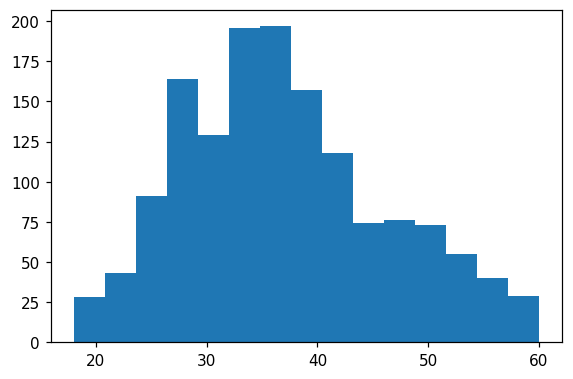

In [ ]:
datos=ibmdata['Age']
pyplot.hist(datos,bins=15)

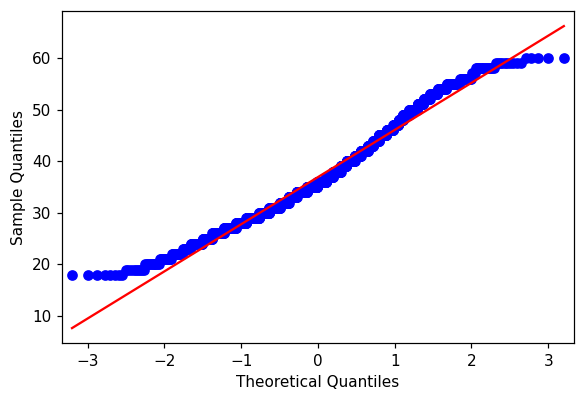

In [ ]:
qqplot(datos , line='s')
plt.show()


In [ ]:
stat, p = shapiro(datos)
print((stat, p))
# Interpretación
alpha = 0.05
if p > alpha:
   print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else:
   print('La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')


(0.9774479269981384, 2.0348782405724304e-14)
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)


In [ ]:
media, desviacion = ss.norm.fit(datos)

print(media) # media = 160,37
print(desviacion) # desviacion = 17,41

36.923809523809524
9.132265690615387


###**Correlación**
---
A continuación realizaremos pruebas de correlación que compararemos para determinar resultados a partir de las comparaciones de diferentes casos

se realizará una prueba de correlación de la muestra total, entre el ingreso mensual con respecto a cada etiqueta, utilizaremos el método **Spearman** para todos los casos de correlación, debido a que las variables numéricas no están normalmente distribuidas como lo determinamos en el proceso anterior

In [ ]:
matriz_corr=ibmdata.corrwith(ibmdata['MonthlyIncome'],method='pearson')
matriz_corr_absoluto=abs(matriz_corr)  
arreglo1=matriz_corr_absoluto.sort_values(ascending=False)

para comparar el resultado anterior realizaremos la misma correlacion pero no sobre la muestra total si no solo con las personas que abandonaron el puesto de trabajo.

In [ ]:
# correlacion de cada columna con respecto a el ingreso nmensual de las personas que renunciaron 
matriz_corr=abandona.corrwith(abandona['MonthlyIncome'],method='pearson')
matriz_corr_absoluto=abs(matriz_corr)  
arreglo2=matriz_corr_absoluto.sort_values(ascending=False)


In [ ]:
# correlacion de cada columna con respecto a el ingreso nmensual de las personas que se quedaron
matriz_corr=queda.corrwith(queda['MonthlyIncome'],method='pearson')
matriz_corr_absoluto=abs(matriz_corr)  
arreglo3=matriz_corr_absoluto.sort_values(ascending=False)


Ser presenta un cuadro comparativo con las dos correlaciones y un indicador si el cambio fue de subida o bajada, evidenciando que existe mayor tendencia a que la correlacion de varias etiquetas aumente si trabajamos con el subgrupo que abandonaron el puesto, es decir que se puede analizar esta diferencia e identificar si esta es la causante de la desercion en empleados. 

In [ ]:
# se crea la matriz para presentar las correlaciones y existe agun cambio
tabla_pago=pd.concat([arreglo1,arreglo2],axis=1)
tabla_pago
tabla_pago['cambio']=0
n=0
for x in tabla_pago.iloc[:,0]:
  if x<= tabla_pago.iloc[n,1]:
    tabla_pago.iloc[n,2]= 'Sube'
  else:
    tabla_pago.iloc[n,2]= 'Baja'
  n=n+1
tabla_pago1=pd.concat([tabla_pago,arreglo3],axis=1)
tabla_pago1

,0,1,cambio,0
MonthlyIncome,1.000000,1.000000,Sube,1.000000
JobLevel,0.950300,0.945540,Baja,0.949976
TotalWorkingYears,0.772523,0.742277,Baja,0.771221
YearsAtCompany,0.514285,0.634973,Sube,0.487315
Age,0.497855,0.500602,Sube,0.486713
YearsInCurrentRole,0.363818,0.561386,Sube,0.320465
YearsSinceLastPromotion,0.344978,0.476264,Sube,0.327084
YearsWithCurrManager,0.344079,0.485162,Sube,0.307697
Attrition,0.159840,NaN,Baja,NaN
NumCompaniesWorked,0.149515,0.187627,Sube,0.155542


In [ ]:
# matriz de correlacion de toda la tabla 
ibmdata.corr() 

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.012225,-0.001686,0.208034,-0.010145,0.010146,0.036311,0.024287,0.029820,0.509604,-0.004892,0.497855,0.299635,0.003634,0.001904,0.053535,0.037510,0.680557,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056565,0.077924,-0.031373,-0.010577,-0.103369,-0.029453,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.043494,-0.013478,0.002889,-0.045872,-0.137145,-0.171078,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.012225,-0.056565,1.000000,-0.006422,-0.019199,-0.050490,0.019425,0.009495,0.024234,0.043915,0.001328,0.031451,0.005989,0.037983,0.025942,0.003049,0.008288,0.042110,0.014504,0.004101,-0.037605,-0.035110,0.009463,-0.036306,-0.027051
DistanceFromHome,-0.001686,0.077924,-0.006422,1.000000,0.021042,0.032916,-0.016075,0.001851,0.031131,0.008783,0.005303,-0.003669,-0.017014,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004915,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.019199,0.021042,1.000000,0.042070,-0.027128,0.016547,0.016775,0.042438,0.101589,-0.011296,0.094961,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148339,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.010577,-0.050490,0.032916,0.042070,1.000000,0.017621,-0.022556,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,-0.001251,-0.012944,-0.020359,-0.069861,0.062227,-0.015036,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.019425,-0.016075,-0.027128,0.017621,1.000000,-0.000508,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002357,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,0.036311,-0.029453,0.009495,0.001851,0.016547,-0.022556,-0.000508,1.000000,0.000478,-0.017960,0.039403,-0.033252,0.031858,0.039147,-0.002733,0.013859,-0.022868,-0.012716,0.046182,0.038787,0.002753,0.029747,0.041483,0.026985,0.030599
HourlyRate,0.024287,-0.006846,0.024234,0.031131,0.016775,0.035179,-0.049857,0.000478,1.000000,0.042861,-0.027853,-0.071335,-0.015794,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.003026,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.043915,0.008783,0.042438,-0.006888,-0.008278,-0.017960,0.042861,1.000000,-0.012630,-0.021476,-0.015271,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.004031,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


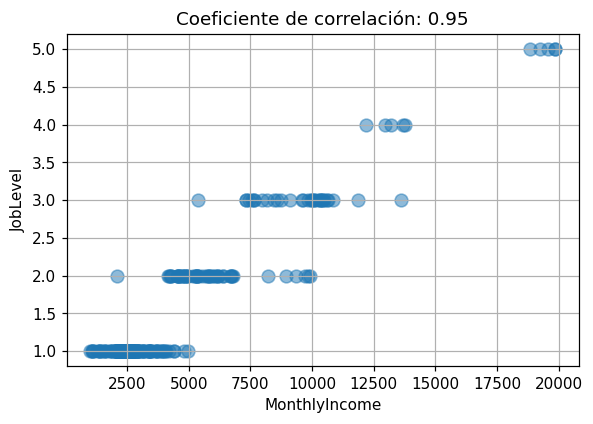

In [ ]:
# grafica de correlacion entre la ganancia mensual y el nivel de trabajo 
def graficar_correlación(df, var_a, var_b):

  r = df[var_a].corr(df[var_b],method='pearson');
  fig, ax = plt.subplots(dpi = 110);
  df.plot.scatter(var_a, var_b, title=f"Coeficiente de correlación: {r :.2}", ax = ax,
                marker='o', linestyle='None', s = 70, alpha = 0.5, grid=True
                ); 
graficar_correlación(abandona,'MonthlyIncome','JobLevel')

###**Intervalos de confianza**
---

In [ ]:
# se hallan los entervalos y se presentan en una tabla
limite_inferior1, limite_superior1 = sm.stats.DescrStatsW(ibmdata['Age']).tconfint_mean(alpha = 0.05)
int1= (limite_inferior1, limite_superior1)
limite_inferior2, limite_superior2 = sm.stats.DescrStatsW(abandona['Age']).tconfint_mean(alpha = 0.05)
int2 = (limite_inferior2, limite_superior2)
limite_inferior22, limite_superior22 = sm.stats.DescrStatsW(queda['Age']).tconfint_mean(alpha = 0.05)
int3 = (limite_inferior22, limite_superior22)
limite_inferior3, limite_superior3 = sm.stats.DescrStatsW(ibmdata['MonthlyIncome']).tconfint_mean(alpha = 0.05)
int4 = (limite_inferior3, limite_superior3)
limite_inferior4, limite_superior4 = sm.stats.DescrStatsW(abandona['MonthlyIncome']).tconfint_mean(alpha = 0.05)
int5 = (limite_inferior4, limite_superior4)
limite_inferior44, limite_superior44 = sm.stats.DescrStatsW(queda['MonthlyIncome']).tconfint_mean(alpha = 0.05)
int6= (limite_inferior44, limite_superior44)
tabla=pd.DataFrame()
tabla['Atributo']=['Edad poblacion','Edad abandonaron','Edad quedan','Ganancia poblacion','Ganancia abandonaron','Ganancia quedan']
tabla['Limite inferior']=[limite_inferior1,limite_inferior2,limite_inferior22,limite_inferior3,limite_inferior4,limite_inferior44]
tabla['Limite superior']=[limite_superior1,limite_superior2,limite_superior22,limite_superior3,limite_superior4,limite_superior44]
tabla 

,Atributo,Limite inferior,Limite superior
0,Edad poblacion,36.456426,37.391193
1,Edad abandonaron,32.367653,34.847537
2,Edad quedan,37.064623,38.057842
3,Ganancia poblacion,6262.062872,6743.799713
4,Ganancia abandonaron,4321.256585,5252.929069
5,Ganancia quedan,6563.537235,7101.942084


###**Pruebas de hipotesis**
---


**1.** para la primer prueba de hipotesis se tiene dos muestras de datos, que son las personas que abandonaron el empleo y las personas que se quedaron en el empleo. se desea saber si tienen un diferencia significativa en el tiempo que estuvieron con el gerente actual.
**Hipótesis**:

* Hipótesis nula $H_0: \mu_1 = \mu_2$ ($\mu_1 - \mu_2 = 0$)
* Hipótesis alternativa $H_a: \mu_1 \neq \mu_2$ ($\mu_1 - \mu_2 \neq 0$)

In [ ]:
z_score, p_valor = sm.stats.ztest(abandona['YearsWithCurrManager'], queda['YearsWithCurrManager'],         # Las dos muestras
                                  value=0,                # La dif=0 es la hipótesis nula
                                  alternative='two-sided' # dos colas
                                  )

print(f"Estadístico: {z_score}\np-valor: {p_valor}")
if p_valor<0.05:
  print('Como el p-valor SI es menor que alpha = 0.05 (nivel de significancia), suficiente evidencia para rechazar la hipótesis nula')
else:
   print('Como el p-valor NO es menor que alpha = 0.05 (nivel de significancia), no hay suficiente evidencia para rechazar la hipótesis nula')


Estadístico: -6.059068531868998
p-valor: 1.3691205589654362e-09
Como el p-valor SI es menor que alpha = 0.05 (nivel de significancia), suficiente evidencia para rechazar la hipótesis nula


El resultado anterior significa que **SI** hay evidencia que indica que las personas que decidieron irse de la empresa tienen diferente tiempo con el jefe actual que las personas que decidieron quedarse.

**2.** para esta prueba de hipotesis se tomaran en cuenta dos grupos distintos que son hombres y mujeres, y se identificara si existe una diferencia significativa en el la clasificacion de rendimiento.
**Hipótesis**:

* Hipótesis nula $H_0: \mu_1 = \mu_2$ ($\mu_1 - \mu_2 = 0$)
* Hipótesis alternativa $H_a: \mu_1 \neq \mu_2$ ($\mu_1 - \mu_2 \neq 0$)

In [ ]:
mujeres=ibmdata.loc[ibmdata['Gender']==1]
hombres=ibmdata.loc[ibmdata['Gender']==0]

In [ ]:
z_score, p_valor = sm.stats.ztest(mujeres['PerformanceRating'], mujeres['PerformanceRating'],         # Las dos muestras
                                  value=0,                # La dif=0 es la hipótesis nula
                                  alternative='two-sided' # dos colas
                                  )

print(f"Estadístico: {z_score}\np-valor: {p_valor}")
if p_valor<0.05:
  print('Como el p-valor SI es menor que alpha = 0.05 (nivel de significancia), suficiente evidencia para rechazar la hipótesis nula')
else:
   print('Como el p-valor NO es menor que alpha = 0.05 (nivel de significancia), no hay suficiente evidencia para rechazar la hipótesis nula')


Estadístico: 0.0
p-valor: 1.0
Como el p-valor NO es menor que alpha = 0.05 (nivel de significancia), no hay suficiente evidencia para rechazar la hipótesis nula


El resultado anterior significa que **NO** hay evidencia para rechazar la hipotesis nula es decir que no se descarta la hipotesis que la clasificacion de rendimiento entre hombres y mujeres sea igual. 

###**Gráficos**
---


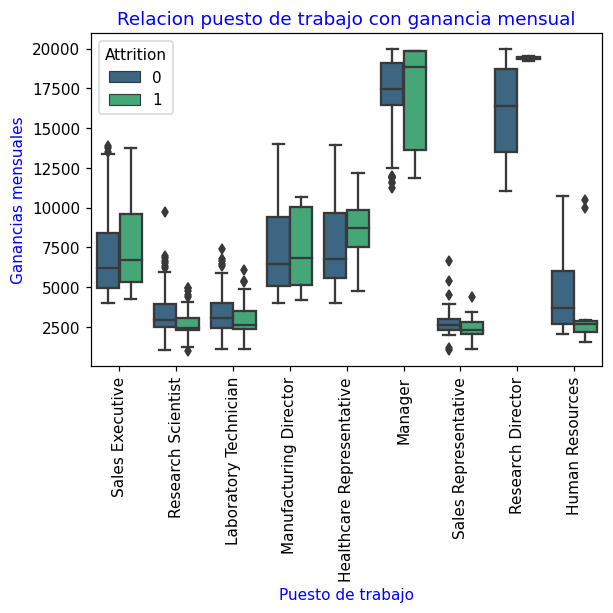

In [ ]:
ganancia_mes=ibmdata['MonthlyIncome'].sort_values()
#fig = plt.figure(figsize=(12,3))
#plt.scatter(ibmdata['MonthlyIncome'],ibmdata['JobLevel'])
ax = sns.boxplot(x="JobRole", 
                 y="MonthlyIncome", 
                 data=ibmdata, 
                 palette='viridis',
                 hue='Attrition')
ax.set_title("Relacion puesto de trabajo con ganancia mensual",color="blue")
ax.set_xlabel("Puesto de trabajo",color="blue")
ax.set_ylabel("Ganancias mensuales",color="blue");
ax.tick_params(axis='x', labelrotation=90)

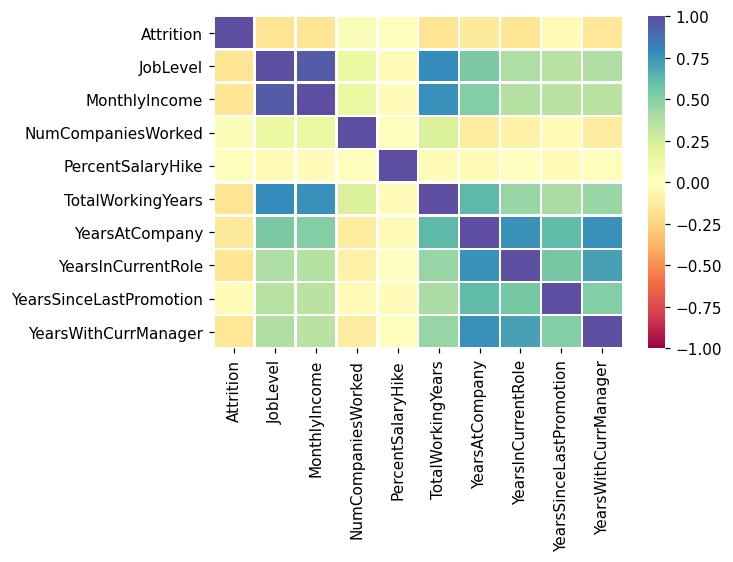

In [ ]:
simplicada=ibmdata
simplicada=simplicada.drop(['DailyRate','Age','HourlyRate','DistanceFromHome','Education','EmployeeNumber','Gender','JobInvolvement','WorkLifeBalance',
                            'TrainingTimesLastYear','RelationshipSatisfaction','PerformanceRating','EnvironmentSatisfaction','JobSatisfaction','StockOptionLevel'], axis=1)
corr= sns.heatmap(simplicada.corr(),cmap='Spectral',vmin=-1,fmt=r'.2f',linewidths=1);

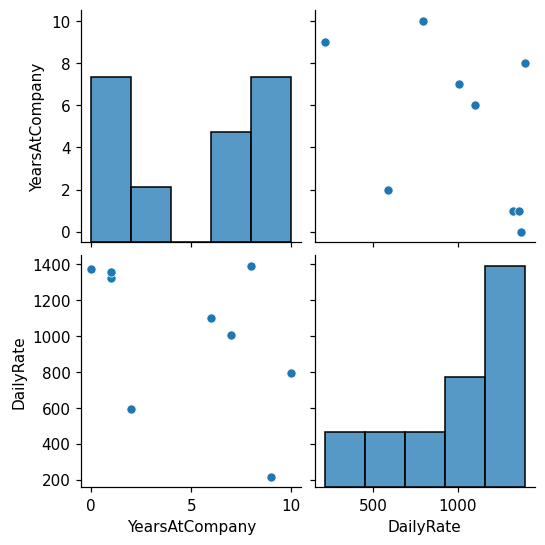

In [ ]:
massim=pd.DataFrame()
massim['YearsAtCompany']=ibmdata['YearsAtCompany']
massim['DailyRate']=ibmdata['DailyRate']
massim=massim.head(9)
sns.pairplot(data=massim);

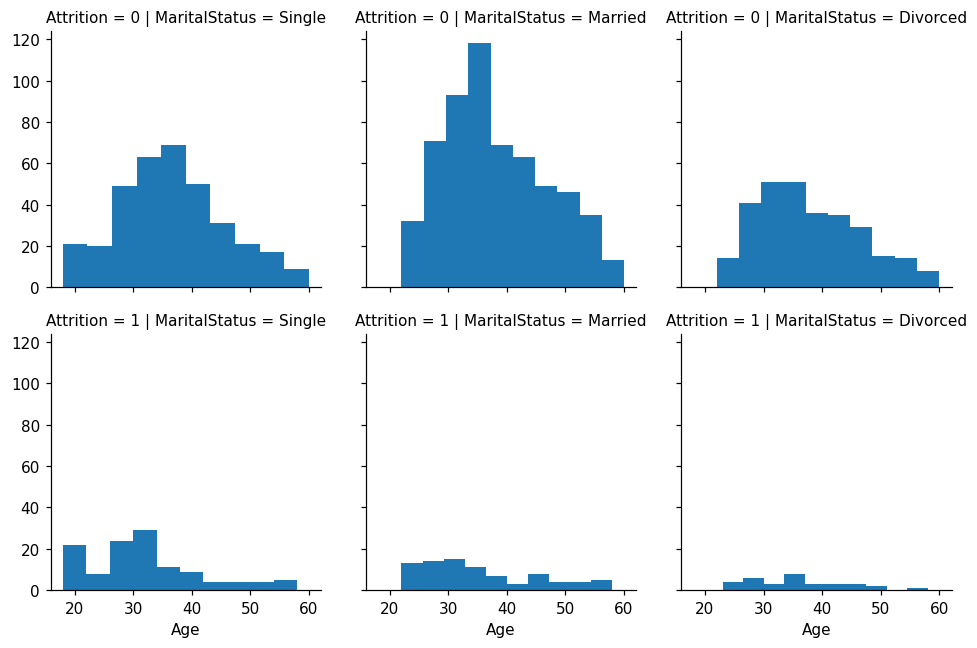

In [ ]:
g = sns.FacetGrid(ibmdata, col="MaritalStatus", row="Attrition")
g = g.map(plt.hist, "Age")

###**Regresion**
---

**Regresiopn Logistica**

In [ ]:
model = sm.GLM.from_formula("Attrition ~ DailyRate", family=sm.families.Binomial(), data=ibmdata)
result = model.fit()

intercepto,pendi= result.params
y=list( map(lambda x: (1)/(1+np.exp(-(intercepto+(pendi*x)))), ibmdata['DailyRate']) )
y=np.array(y)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                            GLM   Df Residuals:                     1468
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -646.94
Date:                Sat, 27 Mar 2021   Deviance:                       1293.9
Time:                        03:03:20   Pearson chi2:                 1.47e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3496      0.152     -8.864      0.000      -1.648      -1.051
DailyRate     -0.0004      0.000     -2.164      0.030      -0.001   -3.62e-05
==============================================================================
"""

**Regresiopn Lineal**

In [ ]:
model = sm.OLS.from_formula("Age ~ DailyRate", data=ibmdata)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2194
Date:                Sat, 27 Mar 2021   Prob (F-statistic):              0.640
Time:                        03:03:20   Log-Likelihood:                -5337.1
No. Observations:                1470   AIC:                         1.068e+04
Df Residuals:                    1468   BIC:                         1.069e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.7014      0.531     69.095      0.000      35.659      37.743
DailyRate      0.0003      0.001      0.468      0.640      -0.001       0.001
==============================================================================
Omnibus:                       54.646   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.888
Skew:                           0.413   Prob(JB):                     5.40e-12
Kurtosis:                       2.594   Cond. No.                     2.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###**Conclusiones**
---

Identificar los principales fatores por los cuales los empleados se van de la empresa.
Identificar si existen condiciones diferentes en cuanto al genero en la empresa.
Generar un modelo que a partir de factores como la ganancia, o el tiempo que lleva trabajndo pueda desertar de la empresa.
1.   Se identifica que los principales causantes de deserción son la ganancia mensual, el nivel trabajo y la cantidad de años que lleva trabajando en la empresa.
2.   Se comprobo que aparte del salario no existe diferencia entre hombres y mujeres
3. Se realizo un modelo lineal para determinar cuanto gana una persona depende su tiempo en la empresa 
4. a partir del salario y el tiempo que llevan trabajando se podria determinar si una persona se ira de la empresa 
5. Las personas que renuencian generalmente son las personas con mayor edad. 

